In [8]:
%matplotlib notebook

# Generators

We have seen how useful **generator** are as **iterables** that are premade of list comprehensions. How can we make our own generators? 

Generators are just functions that encapsulate **state** and return a series of values
Rather than use a **return** it uses **yeild** to return the next item in the list

They are generally used because they are **lazy** and only compute what is needed when its needed. This makes it more efficent on memory and system resources. Lets take a look at an example that can crash a computer due to memory

In [ ]:
with open('some_csv2.txt','w') as csvFile:
    for i in range(1,100000000):
        row = str(list(range(0,50))).replace('[','').replace(']','')+'\n'
        csvFile.write(row)


In [ ]:
def csv_reader(file_name):
    file = open(file_name)
    result = file.read().split("\n")
    return result

csv_gen = csv_reader("some_csv.txt")
row_count = 0

for row in csv_gen:
    row_count += 1

print(f"Row count is {row_count}")

In [ ]:
def csv_reader(file_name):
    for row in open(file_name, "r"):
        yield row
        
        
csv_gen = csv_reader("some_csv.txt")
row_count = 0

for row in csv_gen:
    row_count += 1

print(f"Row count is {row_count}")

**Generators** are Great for Infinite Series

$S_k = \sum_{n=0}^{k}a_n = a_0 + a_1 + \cdots + a_k$

$L = \sum_{n=0}^{\infty}a_n \Leftrightarrow L = \lim_{k \rightarrow \infty} S_k$



**What is the most used infinite series in engineering and physics? **

Its not the Riemann Zeta Function, but lets look at it. 

$\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s} = \frac{1}{1^s} + \frac{1}{2^s} + \frac{1}{3^s} + \cdots$

In [1]:
def Zeta_part(s,p=True):
    n = 1
    while True:
        val = 1/(n**s)
        if p == True:
            print(f"Zeta({s})_{n} = {val}")
        yield val
        n+=1


In [2]:
next(Zeta_part(1))
next(Zeta_part(1))
next(Zeta_part(1))
next(Zeta_part(1))

Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0
Zeta(1)_1 = 1.0


1.0

Why did this not work?

Because we kept remakeing the generator. The solution is to name the generator we make, similar to how we do list comprehensions.

In [3]:
Zeta_1_n = Zeta_part(1)
next(Zeta_1_n)

Zeta(1)_1 = 1.0


1.0

In [4]:
next(Zeta_1_n)
next(Zeta_1_n)
next(Zeta_1_n)
next(Zeta_1_n)

Zeta(1)_2 = 0.5
Zeta(1)_3 = 0.3333333333333333
Zeta(1)_4 = 0.25
Zeta(1)_5 = 0.2


0.2

So now that we have the parts, How do we take calculate the whole $\zeta$ function? 

Well this would take an infinite amount of time to do this way, but we can take it for up to a certain number of $\zeta(s)_n$ 
such that $\zeta(s)~=\sum_{n=1}^{k}\zeta(s)_n$

In [5]:
import math
import itertools

Zeta_2_n = Zeta_part(2,False)
N = 500

Z_n = itertools.islice(Zeta_2_n,N)
Zeta_2 = sum(Z_n)

diff =  (math.pi**2)/6-Zeta_2
print(f"Zeta_2 from n=1 to n={N} is approximately\n {Zeta_2},\nand is off by\n {diff}\nfrom the true value")#.format(N,Zeta_2,diff))


Zeta_2 from n=1 to n=500 is approximately
 1.642936065514894,
and is off by
 0.0019980013333324997
from the true value


## Partial
Partial is an important tool in programming. It lets you do the equivalent of $f(x,y)|_{x=0}$

In [6]:
import numpy as np
def f(x,y):
    return np.sin(x)*np.cos(y)

<IPython.core.display.Javascript object>


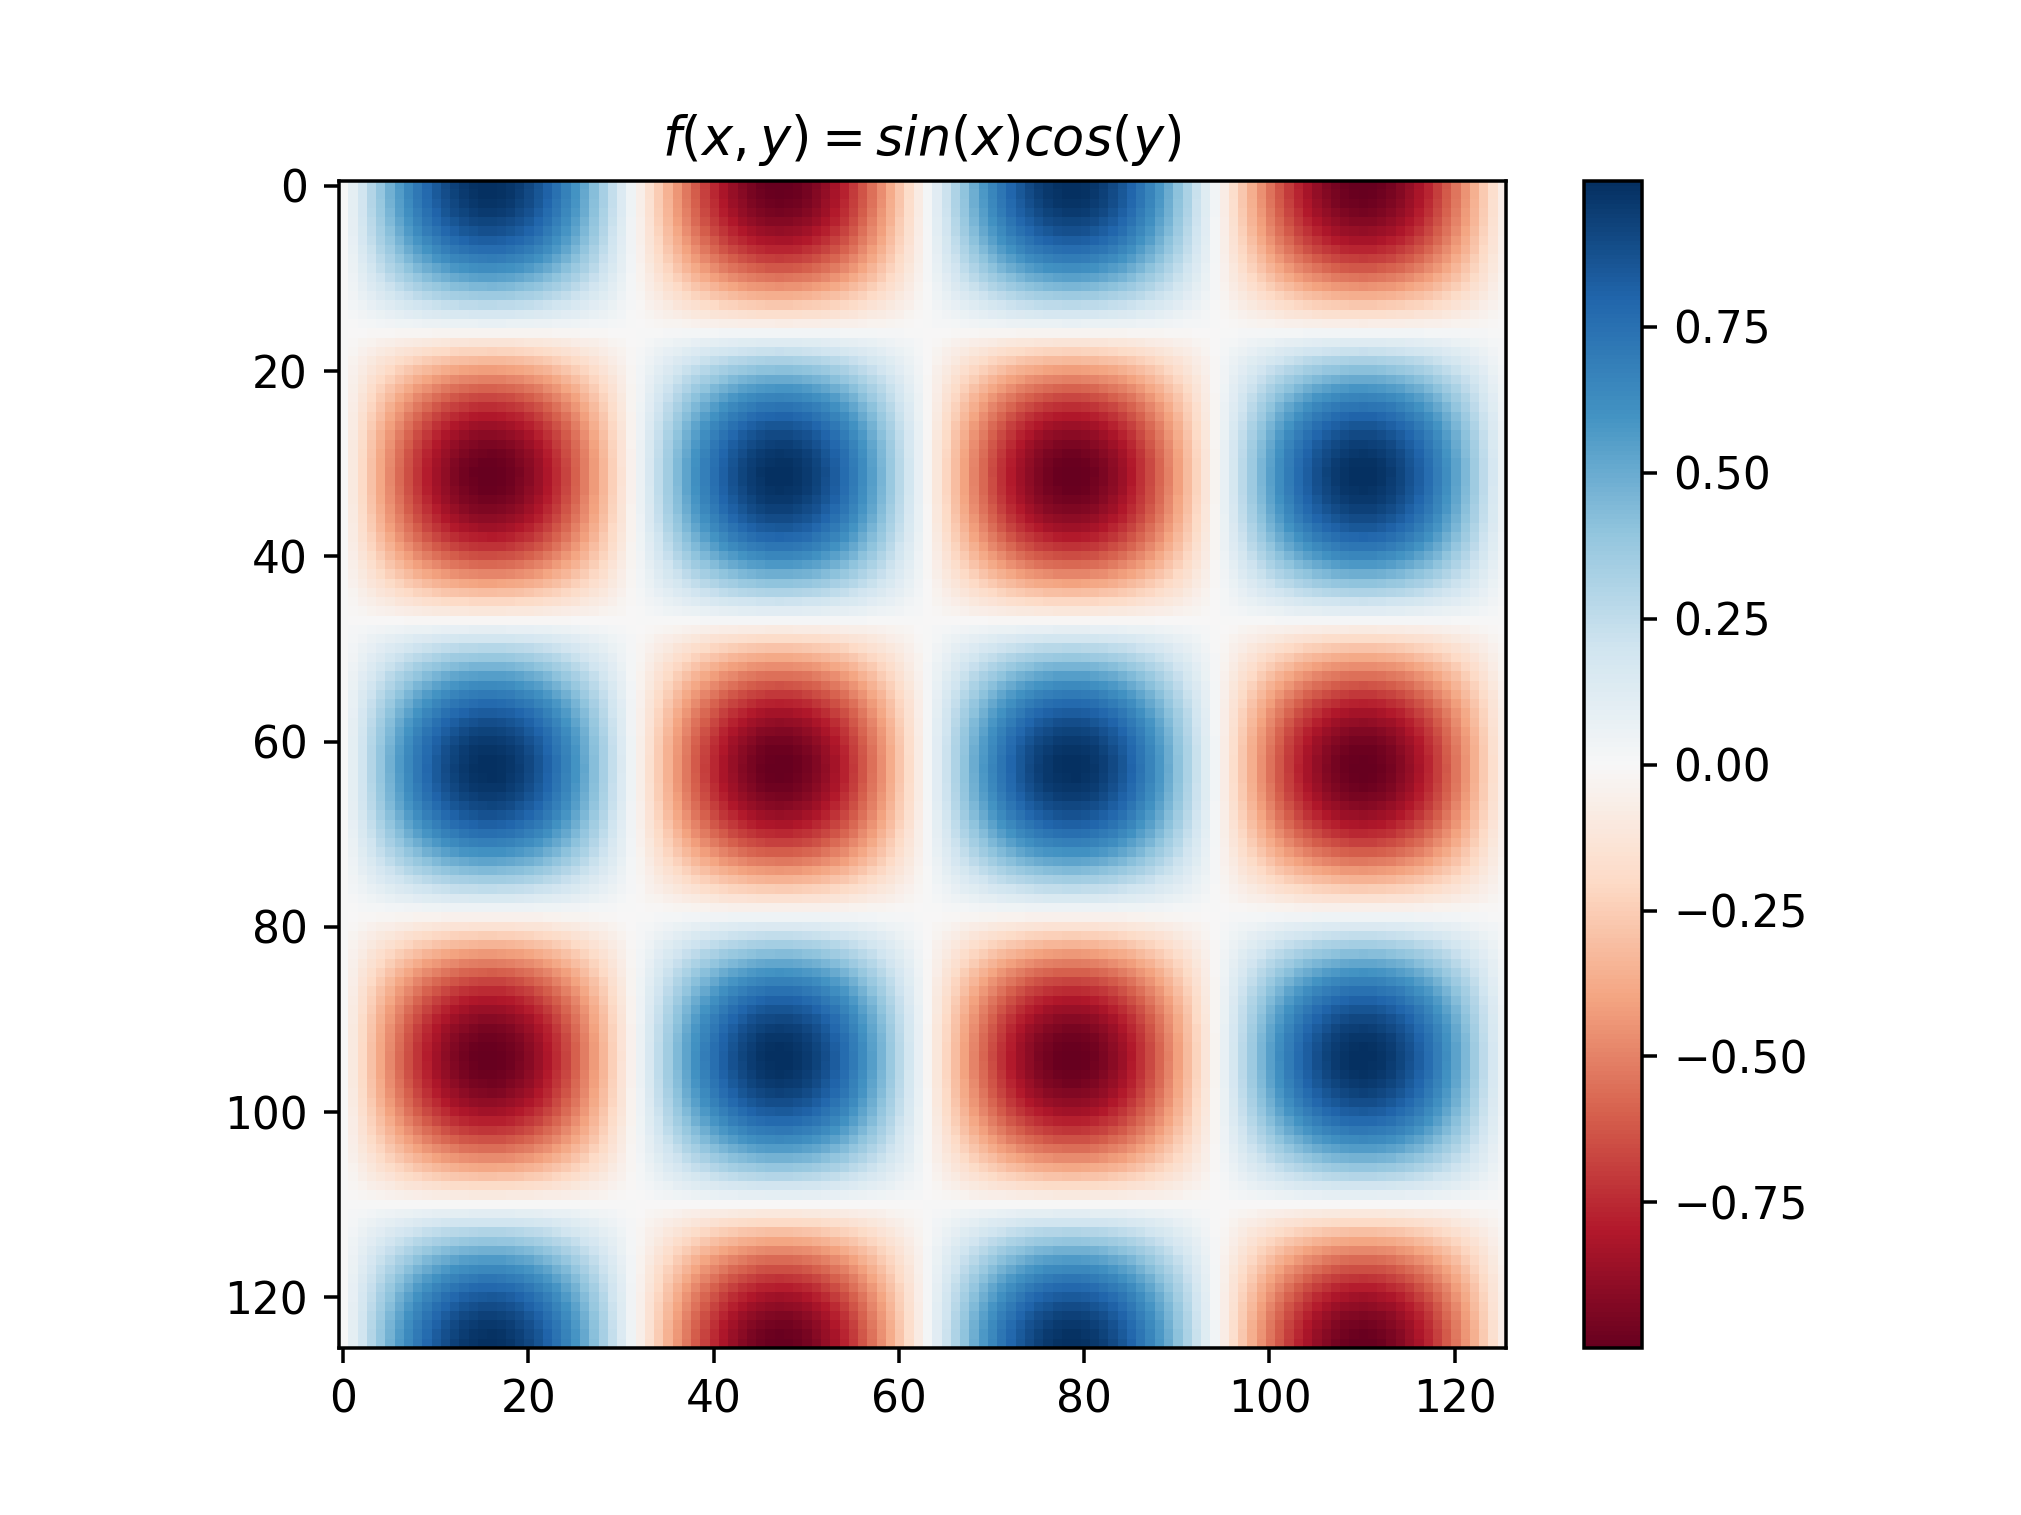

In [9]:
import matplotlib
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show, plot

x = np.arange(-2*np.pi,2*np.pi,0.1)
y = np.arange(-2*np.pi,2*np.pi,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = f(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
#cset = contour(Z,np.arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
#clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$f(x,y)=sin(x)cos(y)$')
show()

<IPython.core.display.Javascript object>


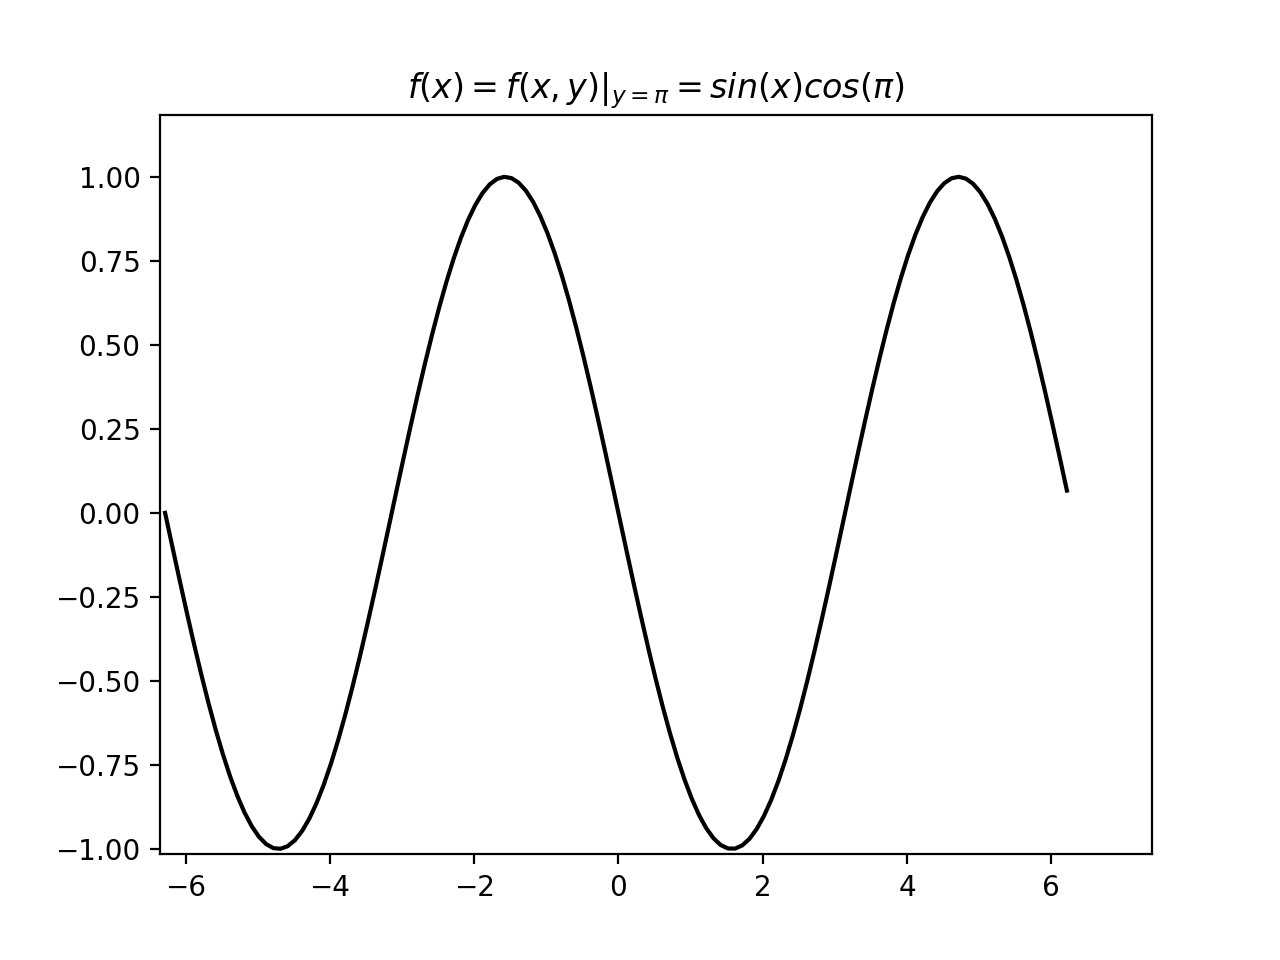

In [10]:
from functools import partial
f_x = partial(f,y=np.pi)

x = np.arange(-2*np.pi,2*np.pi,0.1)
z = f_x(x)
plot(x,z,'k-')
title('$f(x)= f(x,y)|_{y=\pi}=sin(x)cos(\pi)$')
show()

Why Use **Partial**? why not just use a value set?

In [11]:
f_x = f(y=1)

TypeError: f() missing 1 required positional argument: 'x'

Mostly because **partial** allows you to set more than 1 value and not do it in order